In [1]:
!pip install seaborn

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


#Load Labeled Dataset
df = pd.read_csv("Project/reddit_labeled.csv")
df = df[df["label"].isin([
    "neutral", "academic_stress", "relationship_issues",
    "existential_crisis", "social_isolation"
])]

#Split
X = df["clean_text"].astype(str)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec  = tfidf.transform(X_test)

#Train Multi-Class Classifier
clf = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42, class_weight = 'balanced')
clf.fit(X_train_vec, y_train)

#Predictions
y_pred = clf.predict(X_test_vec)

#Classification Report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

#Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {acc:.4f}")

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



 Classification Report:

                     precision    recall  f1-score   support

    academic_stress     0.8956    0.7647    0.8250       527
 existential_crisis     0.3529    0.3333    0.3429        18
            neutral     0.6679    0.7625    0.7121       480
relationship_issues     0.6426    0.6567    0.6496       501
   social_isolation     0.3636    0.3333    0.3478        12

           accuracy                         0.7204      1538
          macro avg     0.5845    0.5701    0.5755      1538
       weighted avg     0.7316    0.7204    0.7232      1538

Overall Accuracy: 0.7204


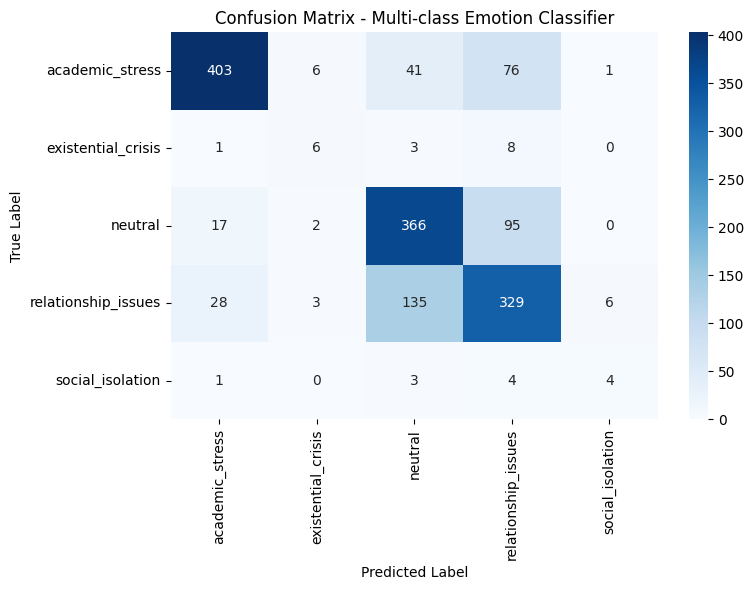

Model saved successfully!


In [2]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Multi-class Emotion Classifier")
plt.tight_layout()
plt.show()

#Save Model + Vectorizer
joblib.dump(clf, "Project/Models/emotion_classifier.joblib")
joblib.dump(tfidf, "Project/Models/tfidf_vectorizer.joblib")

print("Model saved successfully!")

In [10]:
#Load Model and Vectorizer
clf = joblib.load("Project/Models/emotion_classifier.joblib")
tfidf = joblib.load("Project/Models/tfidf_vectorizer.joblib")

#Map Labels to Severity
INTENSITY_LEVELS = {
    "neutral": 0.00,
    "social_isolation": 0.25,
    "relationship_issues": 0.50,
    "academic_stress": 0.75,
    "existential_crisis": 1.00
}

#Predict Function
def predict_emotion_with_intensity(text):
    vec = tfidf.transform([text])
    pred = clf.predict(vec)[0]
    intensity = INTENSITY_LEVELS[pred]
    return pred, intensity

#Example
sample = "My partner broke up."# I hate love, My partner broke up with me.
label, score = predict_emotion_with_intensity(sample)

print(f"Predicted Emotion: {label}")
print(f"Severity Level: {score}")

Predicted Emotion: neutral
Severity Level: 0.0
